In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [2]:
df = pd.read_csv('Downloads/cubic_zirconia.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

There are 697 missing values in variable depth which we are going to impute in further process.

In [4]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [5]:
df.shape

(26967, 11)

In [6]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


Observation:
1.The data set contains 26967 row, 11 columns .

2.In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features. Where 'price' is the target variable.

3.The first column is an index ("Unnamed: 0")as this only serial no, we can remove it.

4.Except depth, in all the column the count is 26967.

In [7]:
df.drop ('Unnamed: 0',axis = 1 , inplace = True)

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [9]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


The first three observations that caught my eye were the x,y,z variables their mean value is 0 which is bit strange to see as we know dimensionless or 2-dimensional diamonds are not possible. So,we are going to drop these values.Carat and price have a slightly distinct nature in terms of their mean and median value resulting in slight skweness also.

In [10]:
print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))

Number of rows with x == 0: 3 
Number of rows with y == 0: 3 
Number of rows with z == 0: 9 


In [11]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(26958, 10)

On the given data set the the mean and median values does not have much differenc. .We can observe Min value of "x", "y", & "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we need to filter out those as it clearly faulty data entries. .Therefore we are going to drop them.
'.

In [12]:
dups = df.duplicated()
print('No of Duplicate present is {} = %d' %(dups.sum()))
print(df.shape)

No of Duplicate present is {} = 33
(26958, 10)


In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.shape

(26925, 10)

In [15]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           779
Good          2434
Very Good     6027
Premium       6880
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4091
F    4722
E    4916
G    5650
Name: color, dtype: int64


CLARITY :  8
I1       362
IF       891
VVS1    1839
VVS2    2530
VS1     4086
SI2     4561
VS2     6092
SI1     6564
Name: clarity, dtype: int64




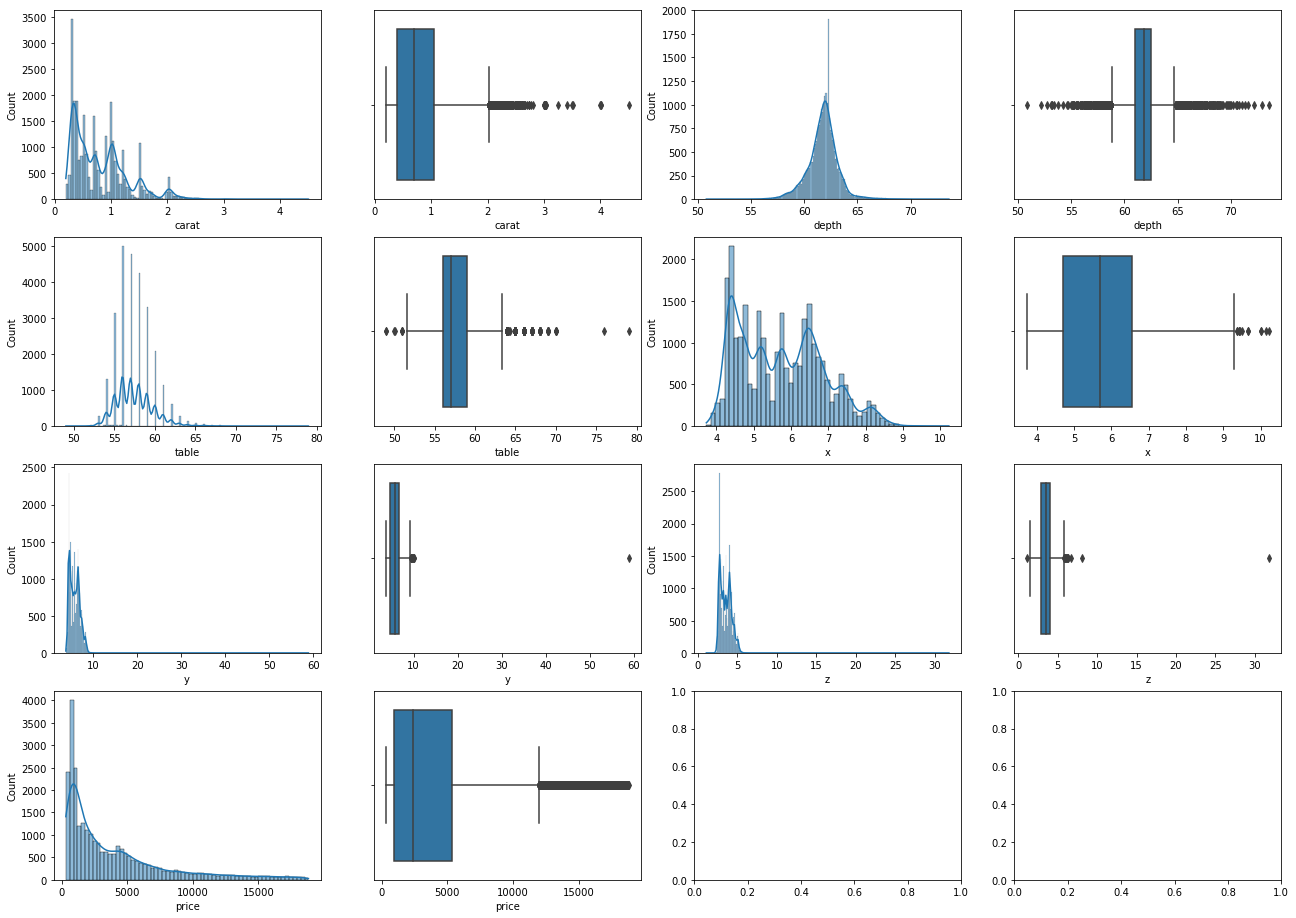

In [16]:
fig, axes = plt.subplots(nrows=4,ncols=4)
fig.set_size_inches(22,16)
sns.histplot(df['carat'], kde=True, ax=axes[0][0]);
sns.boxplot(x='carat', data=df, ax=axes[0][1]);
sns.histplot(df['depth'], kde=True, ax=axes[0][2]);
sns.boxplot(x='depth', data=df, ax=axes[0][3]);
sns.histplot(df['table'], kde=True, ax=axes[1][0]);
sns.boxplot(x='table', data=df, ax=axes[1][1]);
sns.histplot(df['x'], kde=True, ax=axes[1][2]);
sns.boxplot(x='x', data=df, ax=axes[1][3]);
sns.histplot(df['y'], kde=True, ax=axes[2][0]);
sns.boxplot(x='y', data=df, ax=axes[2][1]);
sns.histplot(df['z'], kde=True, ax=axes[2][2]);
sns.boxplot(x='z', data=df, ax=axes[2][3]);
sns.histplot(df['price'], kde=True, ax=axes[3][0]);
sns.boxplot(x='price', data=df, ax=axes[3][1]);

Here, we can see every independent variables have outliers in them and also we can see that the 2 variables have a distinct mean and median value from each other i.e they are not close to each other those variable are carrat and price, for the other independent variables we can see that their mean and median values are almost close with each other because the two variable i.e carat and price their mean and median value are distinct we can get an idea that there must be skweness present in both variables.

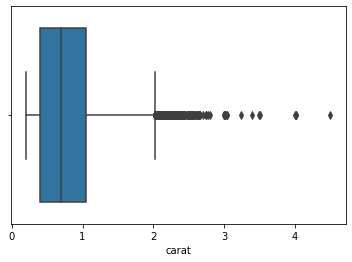

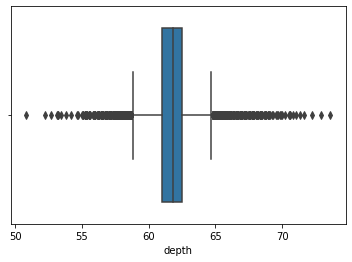

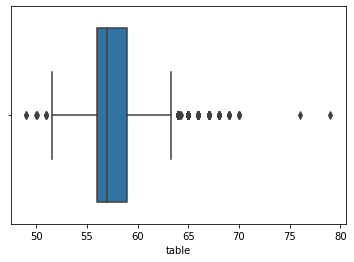

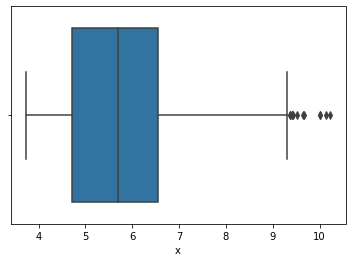

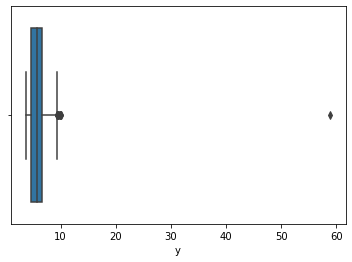

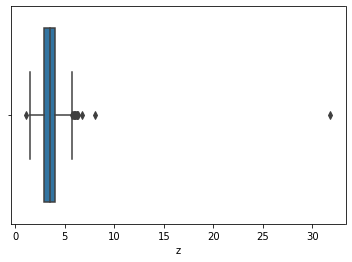

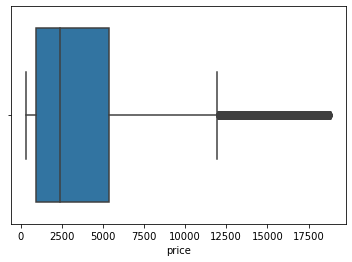

In [17]:
import warnings
warnings.filterwarnings("ignore")

cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

## WE ARE GOING TO TREAT THE OUTLIERS

In [18]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [19]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

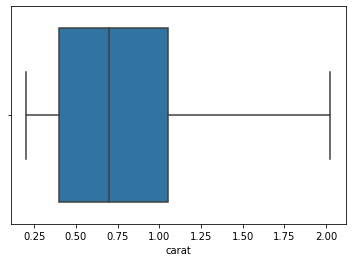

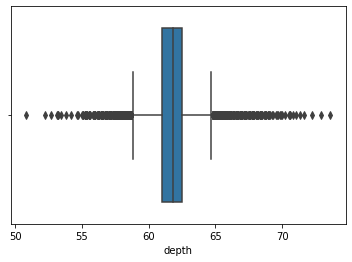

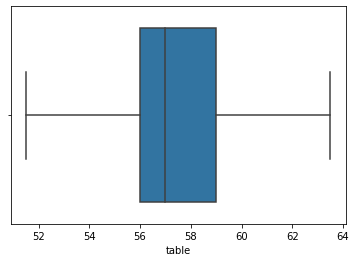

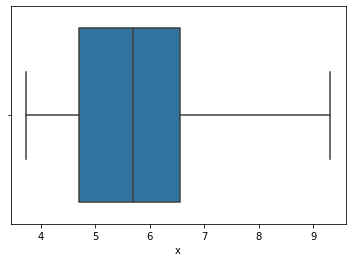

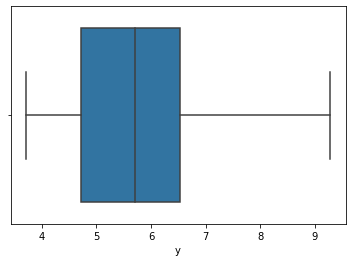

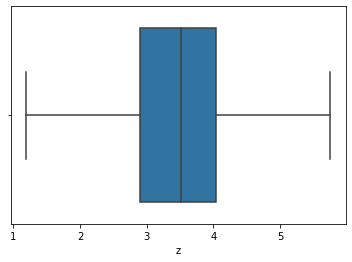

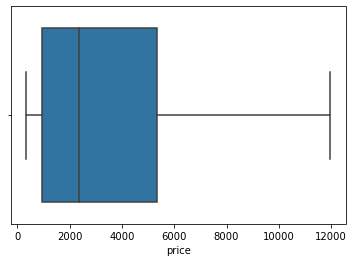

In [20]:
cols = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.show();

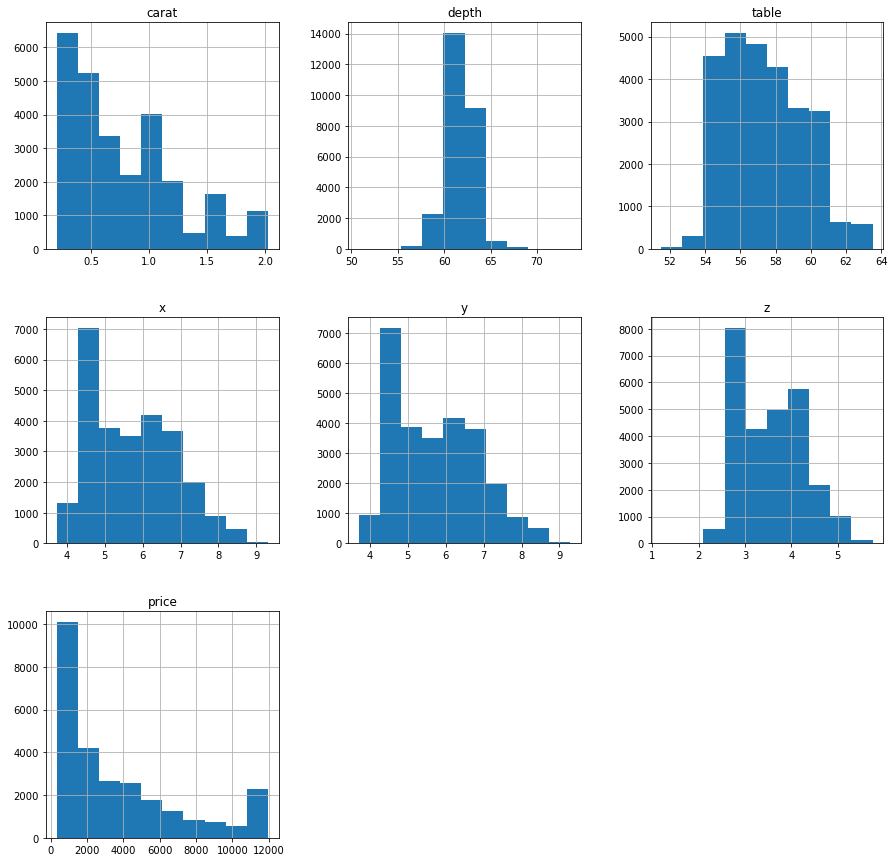

In [21]:
df.hist(figsize=(15,15));

In [22]:
df.skew()

carat    0.917214
depth   -0.025042
table    0.480476
x        0.397696
y        0.394060
z        0.394819
price    1.157121
dtype: float64

Here, we can see that Carat and Price are Skewed

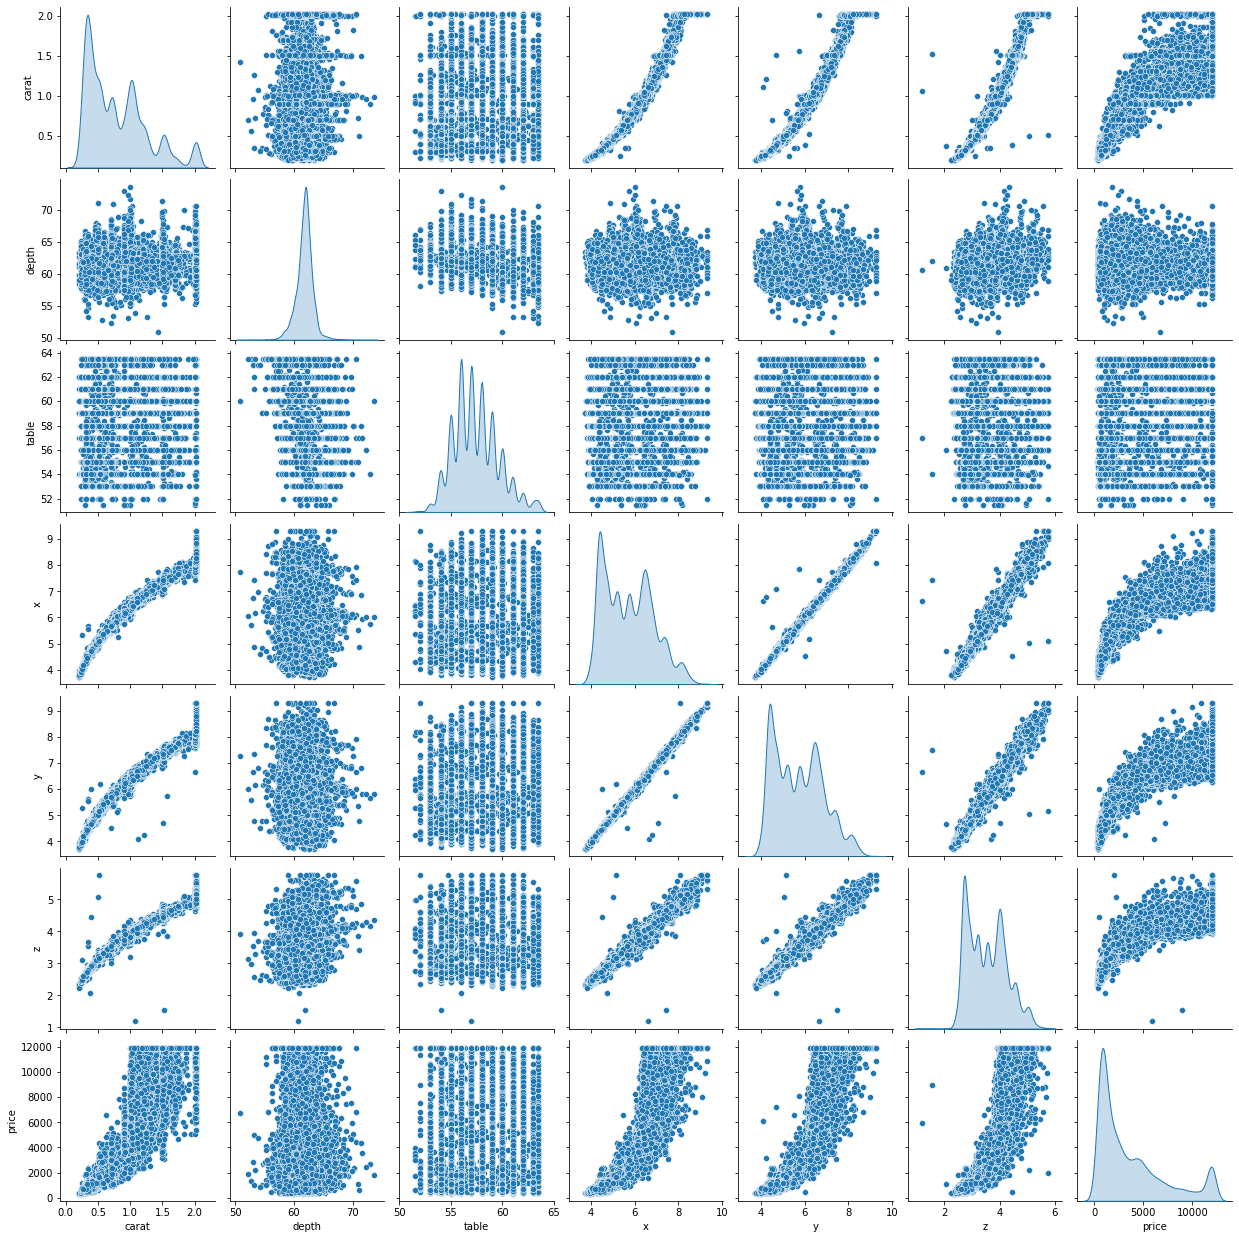

In [23]:
sns.pairplot(df, diag_kind='kde')  
plt.show()

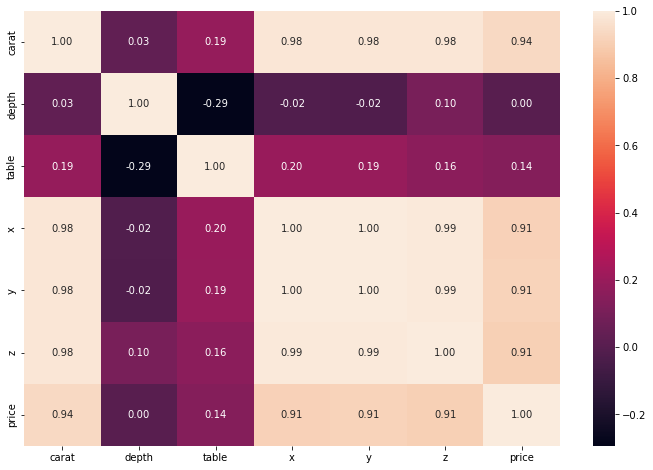

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

## EDA for Categorical variable.

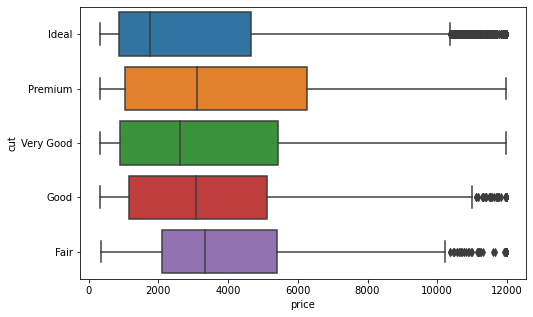

In [25]:
plt.figure(figsize = (8,5))
sns.boxplot(x='price', y='cut', data=df, orient = 'h');

1. Here, we can know the price of every cut type gem and can know which one is cheap and which one is expensive.
2. We can see here that ideal cut type gem is the cheapest one and Premium cut type gem is the most expensive one.
3. Every cut type gems have outliers with them with respect to price leaving Premium & Very Good.
4. Each cut type gems price is decided by their quality or segment i.e. Ideal, Premium, Very Good, Good, Fair.

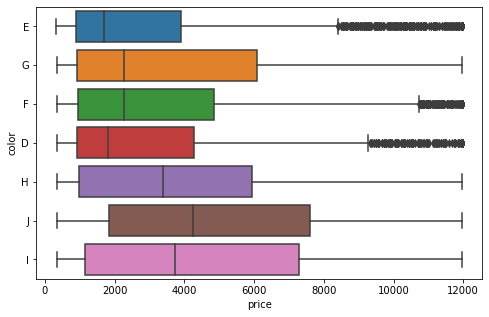

In [26]:
plt.figure(figsize = (8,5))
sns.boxplot(x='price', y='color', data=df, orient = 'h');

1.Here we can see that E coloured gem is the cheapest one and J & I colored gem are the most expensive one.

2.Three colored gems have outliers i.e E, F, D leaving the rest.This insight is with respect to price.

3.Color is having some kind of influence or can say indirect influence on prices of the gems.

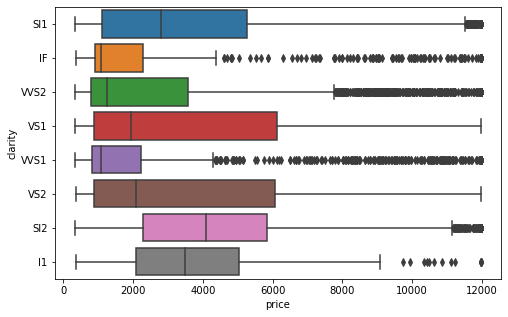

In [27]:
plt.figure(figsize = (8,5))
sns.boxplot(x='price', y='clarity', data=df, orient = 'h');

1.Each segment have its own price according to the quality or demand of it.

2.IF is the cheapest one here while VS1 and VS2 are the most expensive one.

3.Leaving VS1 and VS2 each category have outliers with it.

# Conclusion of EDA:
• Price – This variable gives the continuous output with the price of the cubic zirconia stones. This will be our Target Variable.

• Carat, depth, table, x, y, z variables are numerical or continuous variables.

• x, y, z variables had mean value 0 which was a faulty value so we dropped them and our row came as 26958 & 10 columns.

• Cut, Clarity and colour are categorical variables.

• We will drop the first column ‘Unnamed: 0’ column as this is not important for our study.

• Only in ‘depth 697 missing values are present which we will impute by its median values.

• There are total of 33 duplicate rows as computed using. Duplicated () function. We will drop the duplicates.

• Upon dropping the duplicates – The shape of the data set is – 26925 rows & 10 columns.

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [28]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [29]:
df = df.fillna(df.median())

In [30]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

Checking for the values which are equal to zero.
We have alrady checked for 'Zero' values and we can observe there are some amount of 'Zero' value present on the data set on variable 'x = 3', 'y = 3','z = 9'.

This indicates that they are faulty values.

As we know dimensionless or 2-dimensional diamonds are not possible. So we have filter out those as it clearly faulty data entries.

In [31]:
print('cut\n',df.cut.value_counts())
print('\n')
print('color\n',df.color.value_counts())
print('\n')
print('clarity\n',df.clarity.value_counts())
print('\n')

cut
 Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64


color
 G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64


clarity
 SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64




In [32]:
df['cut']=np.where(df['cut'] =='Ideal', '4', df['cut'])
df['cut']=np.where(df['cut'] =='Premium', '3', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', '2', df['cut'])
df['cut']=np.where(df['cut'] =='Good', '1', df['cut'])
df['cut']=np.where(df['cut'] =='Fair', '0', df['cut'])

In [33]:
df['color']=np.where(df['color'] =='J', '6', df['color'])
df['color']=np.where(df['color'] =='I', '5', df['color'])
df['color']=np.where(df['color'] =='D', '0', df['color'])
df['color']=np.where(df['color'] =='H', '4', df['color'])
df['color']=np.where(df['color'] =='F', '2', df['color'])
df['color']=np.where(df['color'] =='E', '1', df['color'])
df['color']=np.where(df['color'] =='G', '3', df['color'])

In [34]:
df['clarity']=np.where(df['clarity'] =='IF', '7', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', '6', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', '5', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS1', '4', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', '3', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI1', '2', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', '1', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', '0', df['clarity'])

In [35]:
df.cut.value_counts()

4    10805
3     6880
2     6027
1     2434
0      779
Name: cut, dtype: int64

## 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [36]:
# converting the'cut','color','clarity' column from object / string type to float.
df['cut'] = df['cut'].astype('float64')
df['color'] = df['color'].astype('float64')
df['clarity'] = df['clarity'].astype('float64')

In [37]:
df.dtypes

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [38]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,1.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,1.0,5.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,2.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,2.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0


### Train-Test Split

In [39]:
x = df.drop('price', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = df[['price']]
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,1.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,1.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,2.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,2.0,6.0,60.4,59.0,4.35,4.43,2.65


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [41]:
rm = LinearRegression()
rm.fit(x_train, y_train)

LinearRegression()

In [42]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, rm.coef_[0][idx]))

The coefficient for carat is 8901.94122507089
The coefficient for cut is 109.18812485149377
The coefficient for color is -272.92132964490315
The coefficient for clarity is 436.4411042154908
The coefficient for depth is 8.236971791613918
The coefficient for table is -17.345170384368316
The coefficient for x is -1417.9089304449476
The coefficient for y is 1464.827270146809
The coefficient for z is -711.225032681408


Y=mx +c (m= m1,m2,m3...m9) here 9 different co-efficients will learn aling with the intercept which is "c" from the model.

From the above coefficients for each of the independent attributes we can conclude:

The one unit increase in carat increases price by 8901.941.

The one unit increase in cut increases price by 109.188.

The one unit increase in clarity increases price by 436.441.

The one unit increase in depth increases price by 8.236,

The one unit increase in y increases price by 1464.827.

But The one unit increase in table decreases price by -17.345,

The one unit increase in color decreases price by -272.921,

The one unit increase in x decreases price by -1417.908,

The one unit increase in z decreases price by -711.225.

In [43]:
intercept = rm.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1534.4224694382478


In [44]:
rm.score(x_train, y_train)

0.9311935886926559

In [45]:
rm.score(x_test, y_test)

0.931543712584074

In [46]:
predicted_train=rm.fit(x_train, y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

907.1312415459146

In [47]:
predicted_test=rm.fit(x_train, y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

911.8447345328437

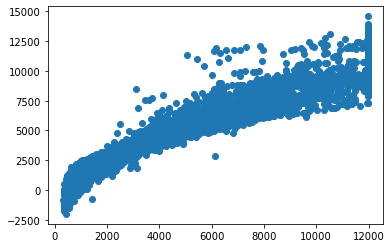

In [50]:
y_pred = rm.predict(x_test)
plt.scatter(y_test['price'], y_pred)

Linear regression Performance Metrics:

1.intercept for the model: -1534.4224694382478

2.R square on training data: 0.9311935886926559

3.R square on testing data: 0.931543712584074

4.RMSE on Training data: 907.1312415459143

5.RMSE on Testing data: 911.8447345328436

6.Our adjusted R-Squared is 0.9312771758547017


In [48]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = df).fit()
lm1.params

Intercept   -2334.381945
carat        8832.855317
cut           104.669525
color        -273.825428
clarity       434.952436
depth          18.369628
table         -15.235849
x           -1220.409362
y            1410.269805
z            -906.253902
dtype: float64

In [49]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 4.055e+04
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:46:40   Log-Likelihood:            -2.2161e+05
No. Observations:               26925   AIC:                         4.432e+05
Df Residuals:                   26915   BIC:                         4.433e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2334.3819    676.918     -3.449      0.0

## Applying zscore statsmodels

With this specific dataset, I don’t think we need to scale the data,
however, to see its impact, lets quickly view the results post scaling the data.
I have used Z score to scale the data. Z-Scores become comparable by measuring
the observations in multiples of the standard deviation of that sample. The mean of a
z-transformed sample is always zero.
from scipy.stats import zscore

x_train_scaled = x_train.apply(zscore)

x_test_scaled = x_test.apply(zscore)

y_train_scaled = y_train.apply(zscore)

y_test_scaled = y_test.apply(zscore)

In [51]:
from scipy.stats import zscore
x_train_scaled  = x_train.apply(zscore)
x_test_scaled = x_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [52]:
rml = LinearRegression()
rml.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [53]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, rml.coef_[0][idx]))

The coefficient for carat is 1.1837737061779434
The coefficient for cut is 0.03512500065529742
The coefficient for color is -0.13449269287641508
The coefficient for clarity is 0.20809779325621863
The coefficient for depth is 0.0033262937188390045
The coefficient for table is -0.010815851633643205
The coefficient for x is -0.459689842412527
The coefficient for y is 0.4716627091792411
The coefficient for z is -0.14249737973827153


In [54]:
intercept = rml.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -5.87961525130473e-16


In [55]:
rml.score(x_train_scaled, y_train_scaled)

0.9311935886926559

In [56]:
rml.score(x_test_scaled, y_test_scaled)

0.9315051288558229

In [57]:
data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,1.10,1.0,1.0,1.0,63.3,56.0,6.53,6.58,4.15,4065.0
12108,1.01,2.0,0.0,1.0,64.0,56.0,6.30,6.38,4.06,5166.0
20181,0.67,1.0,5.0,3.0,60.7,61.4,5.60,5.64,3.41,1708.0
4712,0.76,1.0,3.0,2.0,57.7,63.0,6.05,5.97,3.47,2447.0
2548,1.01,3.0,3.0,4.0,62.8,59.0,6.37,6.34,3.99,6618.0


In [117]:
lm2 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm2.params

Intercept   -1534.422469
carat        8901.941225
cut           109.188125
color        -272.921330
clarity       436.441104
depth           8.236972
table         -17.345170
x           -1417.908930
y            1464.827270
z            -711.225033
dtype: float64

In [59]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.833e+04
Date:                Sun, 31 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:46:40   Log-Likelihood:            -1.5510e+05
No. Observations:               18847   AIC:                         3.102e+05
Df Residuals:                   18837   BIC:                         3.103e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1534.4225    787.066     -1.950      0.0

In [60]:
mse = np.mean((lm2.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [61]:
mse1 = np.mean((lm2.predict(data_test.drop('price',axis=1))-data_test['price'])**2)

In [62]:
np.sqrt(mse)

907.1312415459142

In [63]:
np.sqrt(mse1)

911.8447345328435

In [64]:
y_pred = lm2.predict(data_test)

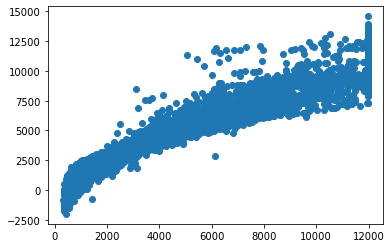

In [65]:
plt.scatter(y_test['price'], y_pred)
plt.show()

Mean Squared Error(Training) = 907.1312415459142

Mean Squared Error(Testing) = 911.8447345328435

R-squared:                       0.931

Adj. R-squared:                  0.931

### Check Multi-collinearity using VIF

In [66]:
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])]

In [67]:
i=0
for column in x.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 121.75332708925261
cut ---> 10.38788625226542
color ---> 3.729750905495899
clarity ---> 5.460420380299075
depth ---> 1219.3950498545585
table ---> 877.9704845924091
x ---> 10743.99485978316
y ---> 9475.980399634736
z ---> 3693.953245513562


1.	Variance inflation factor (VIF) is used to detect the severity of multicollinearity in the ordinary least square (OLS) regression analysis.

2.	Multicollinearity inflates the variance and type II error. It makes the coefficient of a variable consistent but unreliable.

3.	VIF measures the number of inflated variances caused by multicollinearity.


VIF measures the intercorrelation among independent variables in a multiple regression model. In mathematical terms, the variance inflation factor for a regression model variable would be the ratio of the overall model variance to the variance of the model with a single independent variable. As an example, the VIF value for Carat in the table above is the intercorrelation with other independent variables in the dataset and so on for other variables


## 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

We have a database which have strong correlation between independent variables and hence we need to tackle with the issue of multicollinearity which can hinder the results of the model performance. Multicollinearity makes it difficult to understand how one variable influence the target variable. However, it does not affect the accuracy of the model. As a result while creating the model, I had dropped a lot of independent variables displaying multicollinearity or the ones with no direct relation with the target variable.
While we looked at the data during univariate analysis, we were able to establish that Carat is strongly related with the price variable, and also with a lot of other independent variables - x, y, and z, and low correlation with variables such as table and cut as well. It can be established that Carat will be a strong predictor in our model creation. The same trend was displayed even after the object columns were encoded. The carat variable continues to display strong to low correlation with most of the variables, making its claim to be the most important predictor firm.
Recommendations: 
As expected Carat is a strong predictor of the overall price of the stone. Clarity refers to the absence of the Inclusions and Blemishes and has emerged as a strong predictor of price as well. Clarity of stone types IF, VVS_1, VVS_2 and vs1 are helping the firm put an expensive price cap on the stones. Color of the stones such H, I and J won’t be helping the firm put an expensive price cap on such stones. The company should instead focus on stones of color D, E and F to command relative higher price points and support sales. This also can indicate that company should be looking to come up with new color stones like clear stones or a different color/unique color that helps impact the price positively. The company should focus on the stone’s carat and clarity so as to increase their prices. Ideal customers will also contribute to more profits. The marketing efforts can make use of educating customers about the importance of a better carat score and importance of clarity index. Post this, the company can make segments, and target the customer based on their income/paying capacity etc, which can be further studied.



## 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [68]:
hp = pd.read_csv('Downloads/Holiday_Package.csv')
hp.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [69]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [70]:
hp.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [71]:
hp.duplicated().sum()

0

In [72]:
hp.drop('Unnamed: 0', inplace = True, axis = 1)

In [73]:
hp.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
hp.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

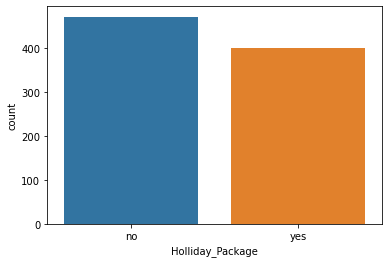

In [75]:
sns.countplot(x = 'Holliday_Package',data = hp);

In [76]:
hp.foreign.value_counts()

no     656
yes    216
Name: foreign, dtype: int64

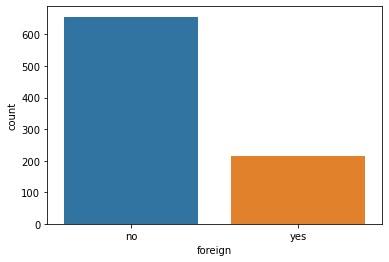

In [77]:
sns.countplot(x = 'foreign',data = hp);

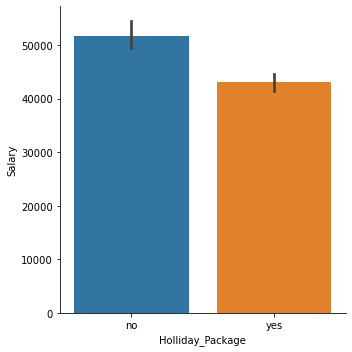

In [78]:
sns.catplot(x = 'Holliday_Package', y = 'Salary', data = hp, kind = 'bar');

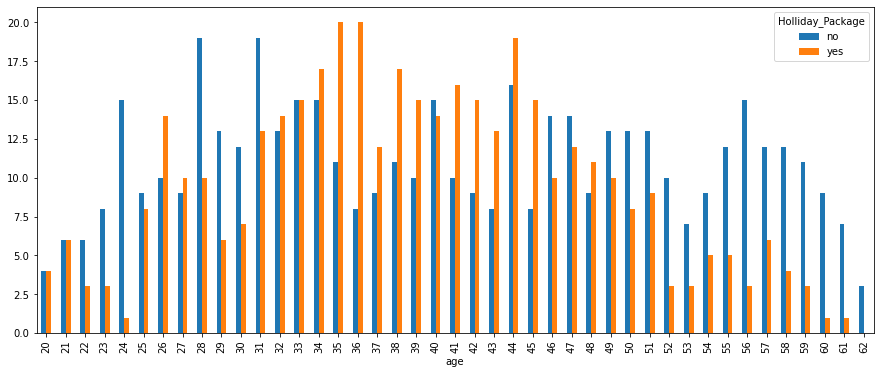

In [79]:
pd.crosstab(hp.age,hp.Holliday_Package).plot(kind = 'bar', figsize = (15,6));

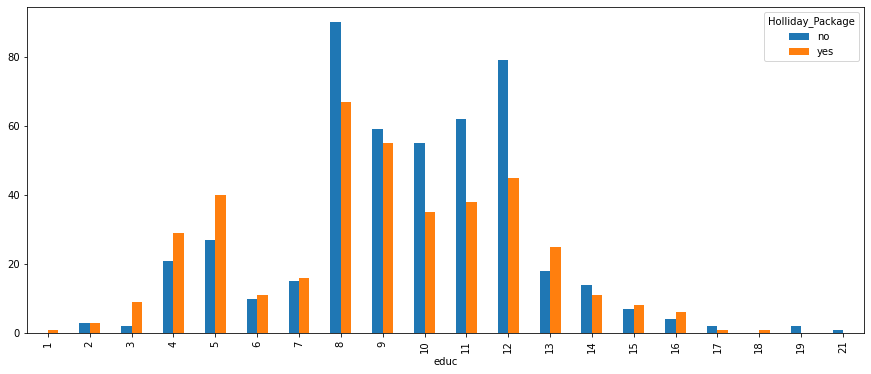

In [80]:
pd.crosstab(hp.educ,hp.Holliday_Package).plot(kind = 'bar', figsize = (15,6));

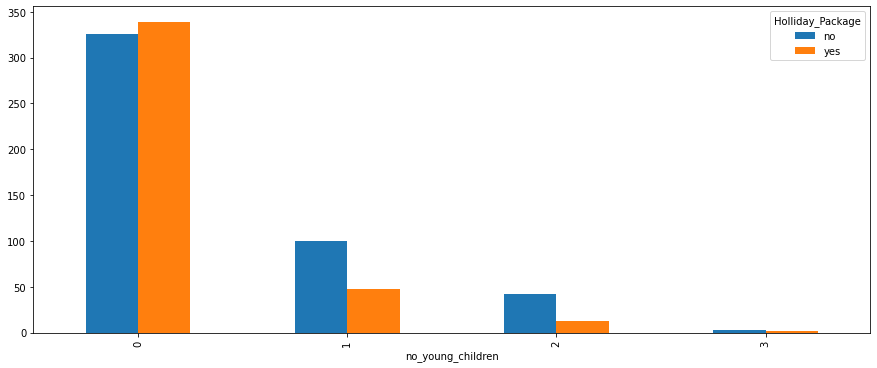

In [81]:
pd.crosstab(hp.no_young_children,hp.Holliday_Package).plot(kind = 'bar', figsize = (15,6));

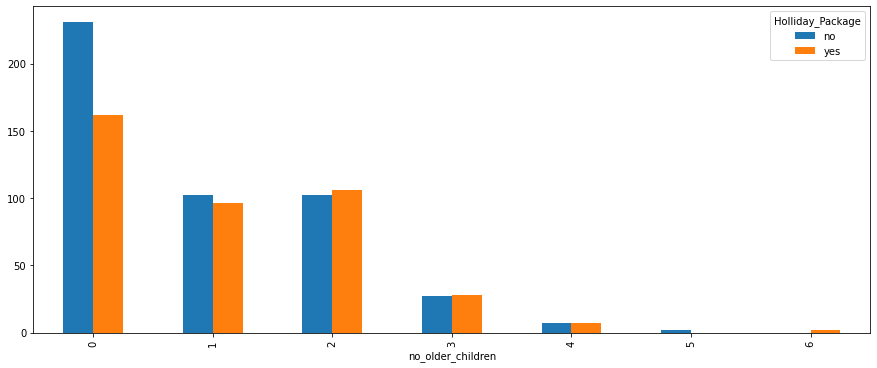

In [82]:
pd.crosstab(hp.no_older_children,hp.Holliday_Package).plot(kind = 'bar', figsize = (15,6));

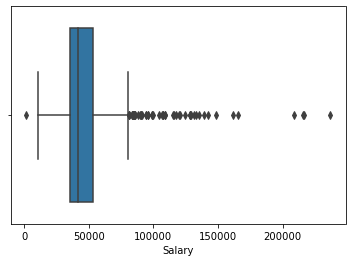

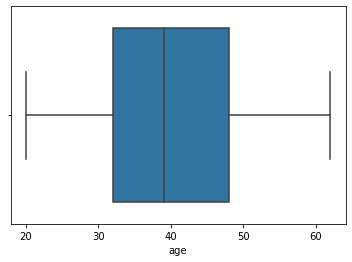

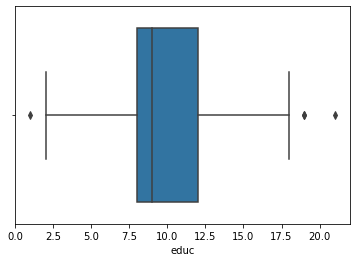

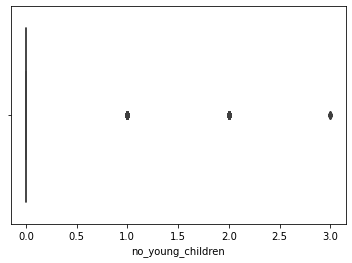

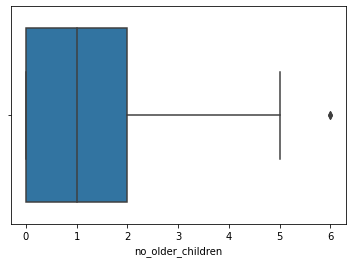

In [83]:
cols = ['Salary','age', 'educ', 'no_young_children', 'no_older_children']
for i in cols:
    sns.boxplot(hp[i],whis=1.5)
    plt.show();

## Treating Outliers

In [84]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [85]:
for column in hp[cols].columns:
    lr,ur=remove_outlier(hp[column])
    hp[column]=np.where(hp[column]>ur,ur,hp[column])
    hp[column]=np.where(hp[column]<lr,lr,hp[column])

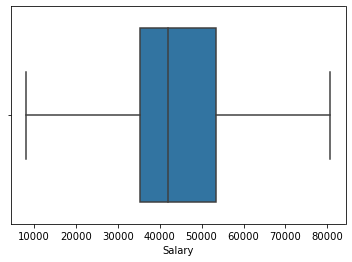

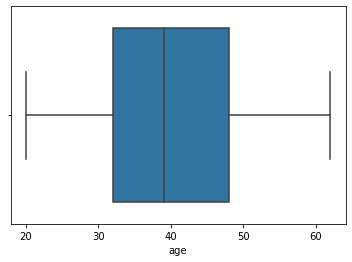

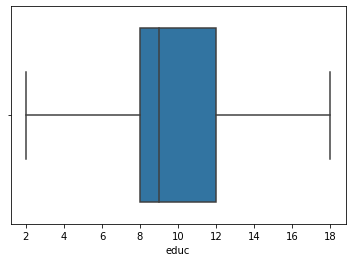

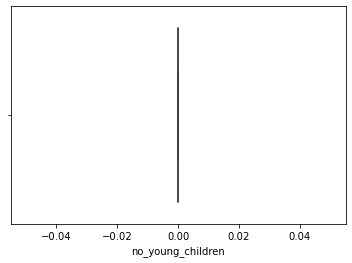

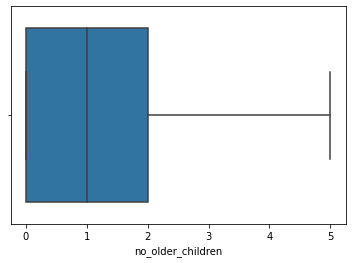

In [86]:
cols = ['Salary','age', 'educ', 'no_young_children', 'no_older_children']
for i in cols:
    sns.boxplot(hp[i],whis=1.5)
    plt.show();

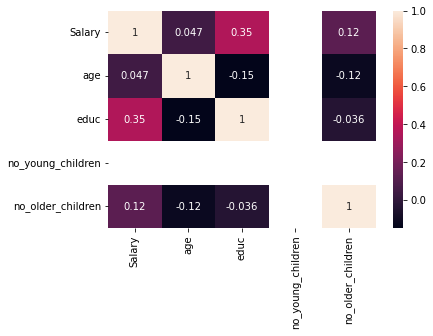

In [87]:
sns.heatmap(hp.corr(),annot = True);

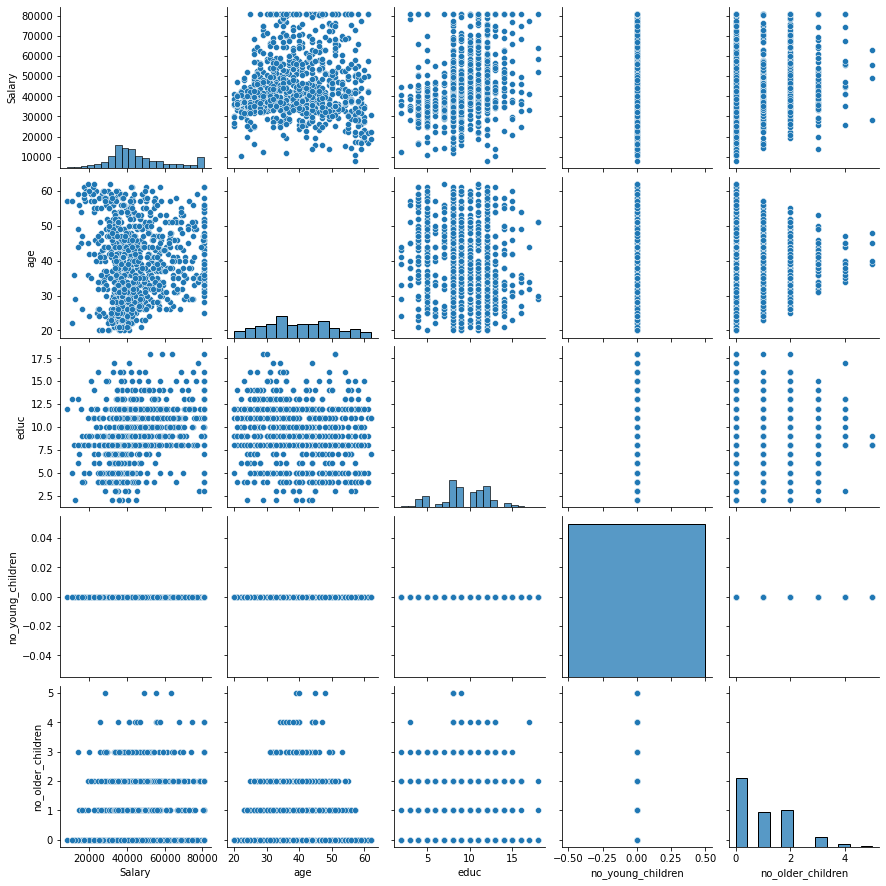

In [88]:
sns.pairplot(hp);

## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [89]:
hp['Holliday_Package']=np.where(hp['Holliday_Package'] =='no', '0', hp['Holliday_Package'])
hp['Holliday_Package']=np.where(hp['Holliday_Package'] =='yes', '1', hp['Holliday_Package'])

In [90]:
hp['foreign']=np.where(hp['foreign'] =='no', '0', hp['foreign'])
hp['foreign']=np.where(hp['foreign'] =='yes', '1', hp['foreign'])

In [91]:
hp['Holliday_Package'] = hp['Holliday_Package'].astype('float64')
hp['foreign'] = hp['foreign'].astype('float64')

In [92]:
x = hp.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = hp[['Holliday_Package']]
x.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412.0,30.0,8.0,0.0,1.0,0.0
1,37207.0,45.0,8.0,0.0,1.0,0.0
2,58022.0,46.0,9.0,0.0,0.0,0.0
3,66503.0,31.0,11.0,0.0,0.0,0.0
4,66734.0,44.0,12.0,0.0,2.0,0.0


In [93]:
x_trains, x_tests, y_trains, y_tests = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {
    'penalty': ['l1','none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'tol': [0.01,0.0001]
}

hp_model = LogisticRegression(verbose=True,n_jobs=-1)
grid_search = GridSearchCV(estimator = hp_model, param_grid = param_grid, cv = 3)

In [95]:
hp_model.fit(x_trains,y_trains)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.9s finished


LogisticRegression(n_jobs=-1, verbose=True)

In [96]:
ytrain_predicts0 = hp_model.predict(x_trains)
ytest_predicts0 = hp_model.predict(x_tests)

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [97]:
hp_model.score(x_trains, y_trains)

0.5344262295081967

In [98]:
hp_model.score(x_tests, y_tests)

0.5534351145038168

AUC: 0.591


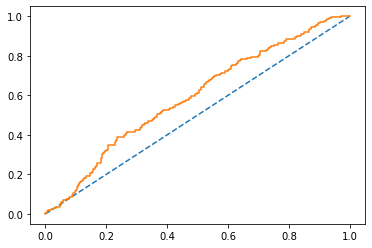

In [99]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# Train Model Roc_AUC SCore
# predict probabilities
probs = hp_model.predict_proba(x_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_trains, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_trains, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.591


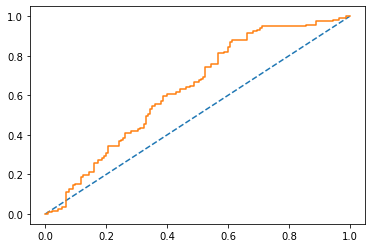

In [100]:
# Test model roc auc score
# predict probabilities
probs = hp_model.predict_proba(x_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_tests, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_tests, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [101]:
confusion_matrix(y_trains, ytrain_predicts0)

array([[326,   0],
       [284,   0]], dtype=int64)

In [102]:
confusion_matrix(y_tests, ytest_predicts0)

array([[145,   0],
       [117,   0]], dtype=int64)

In [103]:
print(classification_report(y_trains, ytrain_predicts0))

              precision    recall  f1-score   support

         0.0       0.53      1.00      0.70       326
         1.0       0.00      0.00      0.00       284

    accuracy                           0.53       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.53      0.37       610



In [104]:
print(classification_report(y_tests, ytest_predicts0))

              precision    recall  f1-score   support

         0.0       0.55      1.00      0.71       145
         1.0       0.00      0.00      0.00       117

    accuracy                           0.55       262
   macro avg       0.28      0.50      0.36       262
weighted avg       0.31      0.55      0.39       262



In [105]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [106]:
param_grids = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'tol': [0.01,0.0001]
}

lr_model = LinearDiscriminantAnalysis()
grid_search = GridSearchCV(estimator = lr_model, param_grid = param_grids, cv = 3)

In [107]:
lr_model.fit(x_trains,y_trains)

LinearDiscriminantAnalysis()

In [108]:
ytrain_predicts00 = lr_model.predict(x_trains)
ytest_predicts00 = lr_model.predict(x_tests)

In [109]:
lr_model.score(x_trains, y_trains)

0.6426229508196721

In [110]:
lr_model.score(x_tests, y_tests)

0.6297709923664122

AUC: 0.667


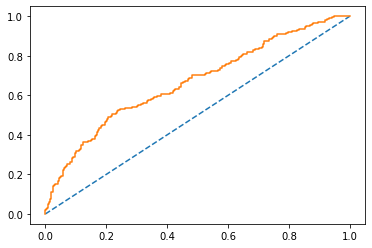

In [111]:
# Train Model Roc_AUC SCore
# predict probabilities
probs = lr_model.predict_proba(x_trains)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_trains, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_trains, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

AUC: 0.667


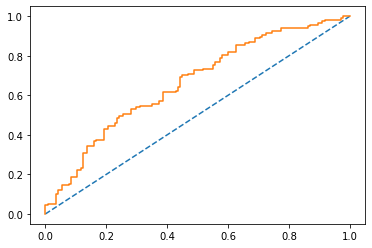

In [112]:
# Test model roc auc score
# predict probabilities
probs = lr_model.predict_proba(x_tests)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_tests, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_tests, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

In [113]:
confusion_matrix(y_trains, ytrain_predicts00)

array([[269,  57],
       [161, 123]], dtype=int64)

In [114]:
confusion_matrix(y_tests, ytest_predicts00)

array([[113,  32],
       [ 65,  52]], dtype=int64)

In [115]:
print(classification_report(y_trains, ytrain_predicts00))

              precision    recall  f1-score   support

         0.0       0.63      0.83      0.71       326
         1.0       0.68      0.43      0.53       284

    accuracy                           0.64       610
   macro avg       0.65      0.63      0.62       610
weighted avg       0.65      0.64      0.63       610



In [116]:
print(classification_report(y_tests, ytest_predicts00))

              precision    recall  f1-score   support

         0.0       0.63      0.78      0.70       145
         1.0       0.62      0.44      0.52       117

    accuracy                           0.63       262
   macro avg       0.63      0.61      0.61       262
weighted avg       0.63      0.63      0.62       262



### I will be choosing LDA model because as we can see its giving better accuracy and overall values of the different variables so I would be going forward with LDA and also it’s a very flexible model to use so on the basis of auc roc curve and value we can see its clear that LDA is the better one then the Logistic regression model. 

## 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

As interpretation, 
1) There is no plausible effect of salary, age, and education on the prediction for Holliday_packages. These variables don’t seem to impact the decision to opt for holiday packages as we couldn’t establish a strong relation of these variables with the target variable

2) Foreign has emerged as a strong predictor with a positive coefficient value. The log likelihood or likelihood of a foreigner opting for a holiday package is high. 

3) no_young_children variable is negating the probability for opting for holiday packages, especially for couple with number of young children at 2. 

The company can try to bin salary ranges to see if they can derive some more meaningful interpretations out of that variable. May be club the salary or age in different buckets and see if there is some plausible impact on the predictor variable. OR else, the business can use some different model techniques to do a deep dive. 
Recommendation: 

1) The company should really focus on foreigners to drive the sales of their holiday packages as that’s where the majority of conversions are going to come in. 

2) The company can try to direct their marketing efforts or offers toward foreigners for a better conversion opting for holiday packages 

3) The company should also stay away from targeting parents with younger children. The chances of selling to parents with 2 younger children is probably the lowest. This also gels with the fact that parents try and avoid visiting with younger children. 

4) If the firm wants to target parents with older children, that still might end up giving favorable return for their marketing efforts then spent on couples with younger children.
